# Pandas Workshop at DataHarvest 2016

This is how you import pandas. It's customary to import it as "pd".

In [107]:
import pandas as pd

This is how you can load a CSV file. There are also other ways to load in data, such as `read_excel` or `read_json`

In [108]:
df = pd.read_csv('gb_201415.csv')

`df` stands for DataFrame and is basically a table with rows and columns.

`df.head()` shows the first 5 rows, you can also show more, e.g. `df.head(20)`

In [109]:
df.head()

,year,recipient_id,recipient_name,recipient_postcode,recipient_location,agency,scheme,amount,country,currency
0,2015,GB-SY23-WELSH ASSEMBLY GOVERNMENT,WELSH ASSEMBLY GOVERNMENT,SY23,ABERYSTWYTH,WG,Technical Assistance,"7,636,181.83",GB,GBP
1,2015,GB-WR5-Natural England,Natural England,WR5,WORCESTER,RPA,Technical Assistance,"7,373,572.0",GB,GBP
2,2014,GB-SY23-WELSH ASSEMBLY GOVERNMENT,WELSH ASSEMBLY GOVERNMENT,SY23,ABERYSTWYTH,WG,Technical Assistance,"6,128,222.74",GB,GBP
3,2015,GB-CB7-G'S GROWERS LTD,G'S GROWERS LTD,CB7,ELY,RPA,Aid in fruit and vegetables sector,"5,807,429.64",GB,GBP
4,2014,GB-PL30-National Trust,National Trust,PL30,Bodmin,RPA,Agri-environment payments,"4,646,028.86",GB,GBP


Let's look at the data types of the columns.

In [110]:
df.dtypes

year                   int64
recipient_id          object
recipient_name        object
recipient_postcode    object
recipient_location    object
agency                object
scheme                object
amount                object
country               object
currency              object
dtype: object

Looks like the amount is not detected correctly due to the thousand separators. Let's clean it!

## Cleaning

In [111]:
df2 = df.copy()
df2['amount_clean'] = df2['amount'].str.replace(',', '')
df2.head()

,year,recipient_id,recipient_name,recipient_postcode,recipient_location,agency,scheme,amount,country,currency,amount_clean
0,2015,GB-SY23-WELSH ASSEMBLY GOVERNMENT,WELSH ASSEMBLY GOVERNMENT,SY23,ABERYSTWYTH,WG,Technical Assistance,"7,636,181.83",GB,GBP,7636181.83
1,2015,GB-WR5-Natural England,Natural England,WR5,WORCESTER,RPA,Technical Assistance,"7,373,572.0",GB,GBP,7373572.0
2,2014,GB-SY23-WELSH ASSEMBLY GOVERNMENT,WELSH ASSEMBLY GOVERNMENT,SY23,ABERYSTWYTH,WG,Technical Assistance,"6,128,222.74",GB,GBP,6128222.74
3,2015,GB-CB7-G'S GROWERS LTD,G'S GROWERS LTD,CB7,ELY,RPA,Aid in fruit and vegetables sector,"5,807,429.64",GB,GBP,5807429.64
4,2014,GB-PL30-National Trust,National Trust,PL30,Bodmin,RPA,Agri-environment payments,"4,646,028.86",GB,GBP,4646028.86


.. and convert it to a number

In [112]:
df2['amount_clean'] = pd.to_numeric(df2['amount_clean'])
df2.dtypes

year                    int64
recipient_id           object
recipient_name         object
recipient_postcode     object
recipient_location     object
agency                 object
scheme                 object
amount                 object
country                object
currency               object
amount_clean          float64
dtype: object

we can now lose the original column. If you want to get rid of multiple columns, you can use a list, such as `['amount', 'somethingelse']`. The `1` stands for `axis`. `axis 1` is the columns (header), `axis 0` is the rows (index)

In [113]:
df2 = df2.drop('amount', 1)
df2.head()

,year,recipient_id,recipient_name,recipient_postcode,recipient_location,agency,scheme,country,currency,amount_clean
0,2015,GB-SY23-WELSH ASSEMBLY GOVERNMENT,WELSH ASSEMBLY GOVERNMENT,SY23,ABERYSTWYTH,WG,Technical Assistance,GB,GBP,7636181.83
1,2015,GB-WR5-Natural England,Natural England,WR5,WORCESTER,RPA,Technical Assistance,GB,GBP,7373572.00
2,2014,GB-SY23-WELSH ASSEMBLY GOVERNMENT,WELSH ASSEMBLY GOVERNMENT,SY23,ABERYSTWYTH,WG,Technical Assistance,GB,GBP,6128222.74
3,2015,GB-CB7-G'S GROWERS LTD,G'S GROWERS LTD,CB7,ELY,RPA,Aid in fruit and vegetables sector,GB,GBP,5807429.64
4,2014,GB-PL30-National Trust,National Trust,PL30,Bodmin,RPA,Agri-environment payments,GB,GBP,4646028.86


we can also rename columns. Let's name the clean amount just an `amount` now that we dropped the dirty one

In [114]:
df2 = df2.rename(columns={'amount_clean': 'amount'})
df2.head()

,year,recipient_id,recipient_name,recipient_postcode,recipient_location,agency,scheme,country,currency,amount
0,2015,GB-SY23-WELSH ASSEMBLY GOVERNMENT,WELSH ASSEMBLY GOVERNMENT,SY23,ABERYSTWYTH,WG,Technical Assistance,GB,GBP,7636181.83
1,2015,GB-WR5-Natural England,Natural England,WR5,WORCESTER,RPA,Technical Assistance,GB,GBP,7373572.00
2,2014,GB-SY23-WELSH ASSEMBLY GOVERNMENT,WELSH ASSEMBLY GOVERNMENT,SY23,ABERYSTWYTH,WG,Technical Assistance,GB,GBP,6128222.74
3,2015,GB-CB7-G'S GROWERS LTD,G'S GROWERS LTD,CB7,ELY,RPA,Aid in fruit and vegetables sector,GB,GBP,5807429.64
4,2014,GB-PL30-National Trust,National Trust,PL30,Bodmin,RPA,Agri-environment payments,GB,GBP,4646028.86


Wondering if you can do this easier? Yes you can! Just in one step by combining the operations like this:

In [115]:
df['amount'] = pd.to_numeric(df['amount'].str.replace(',', ''))
df.head()

,year,recipient_id,recipient_name,recipient_postcode,recipient_location,agency,scheme,amount,country,currency
0,2015,GB-SY23-WELSH ASSEMBLY GOVERNMENT,WELSH ASSEMBLY GOVERNMENT,SY23,ABERYSTWYTH,WG,Technical Assistance,7636181.83,GB,GBP
1,2015,GB-WR5-Natural England,Natural England,WR5,WORCESTER,RPA,Technical Assistance,7373572.00,GB,GBP
2,2014,GB-SY23-WELSH ASSEMBLY GOVERNMENT,WELSH ASSEMBLY GOVERNMENT,SY23,ABERYSTWYTH,WG,Technical Assistance,6128222.74,GB,GBP
3,2015,GB-CB7-G'S GROWERS LTD,G'S GROWERS LTD,CB7,ELY,RPA,Aid in fruit and vegetables sector,5807429.64,GB,GBP
4,2014,GB-PL30-National Trust,National Trust,PL30,Bodmin,RPA,Agri-environment payments,4646028.86,GB,GBP


## Analysis

In [116]:
df.describe(include='all')

,year,recipient_id,recipient_name,recipient_postcode,recipient_location,agency,scheme,amount,country,currency
count,1000.000000,1000,1000,1000,1000,1000,1000,1.000000e+03,1000,1000
unique,NaN,649,634,433,433,5,31,NaN,1,1
top,NaN,GB-LL15-CADWYN CLWYD CYFYNGEDIG LTD,National Trust,SY23,LINCOLN,RPA,Single area payment scheme,NaN,GB,GBP
freq,NaN,5,8,12,18,671,578,NaN,1000,1000
mean,2014.422000,NaN,NaN,NaN,NaN,NaN,NaN,5.087952e+05,NaN,NaN
std,0.494126,NaN,NaN,NaN,NaN,NaN,NaN,6.140205e+05,NaN,NaN
min,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.381948e+05,NaN,NaN
25%,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.717366e+05,NaN,NaN
50%,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.337836e+05,NaN,NaN
75%,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.867624e+05,NaN,NaN


Let's say we'd like to know how much money has been spent on these subsidies. We can use `sum()`

In [117]:
df['amount'].sum()

508795166.64000005

Or how many funds have been distributed per scheme

In [118]:
df['scheme'].value_counts()

Single area payment scheme                                                              578
Implementing local development strategies. Quality of life/diversification               65
Agri-environment payments                                                                61
Adding value to agricultural and forestry products                                       49
Aid in fruit and vegetables sector                                                       36
Investment in forest area development and improvement of the viability of forests        28
Investments in physical assets                                                           21
Non-productive investments                                                               18
Vocational training and information actions                                              16
First afforestation of agricultural land                                                 16
Agri-environment-climate                                                        

What if we want to look which 10 recipients got the most subsidies in 2015?

In [119]:
df.groupby(['recipient_name', 'year'])['amount'].sum().unstack().sort_values(2015).head(10)

year,2014,2015
recipient_name,,
R F STRATTON & CO,264098.61,239206.28
Dennington Hall Farms,NaN,239995.09
Mansionhouse Farm,NaN,240040.05
HARROWDEN FARMS LTD,252661.12,240045.86
Glenapp Estate Company Ltd,284377.41,240102.57
CROSSFELL COMMONERS ASSOCIATION,323866.09,240443.40
CONWY COUNTY BOROUGH COUNCIL,663372.47,240463.51
The President Estate Farming Partnership,257909.19,240634.71
SCOTT & SCOTT,266807.59,240977.06


or even easier, we make a pivot table!

In [120]:
df.pivot_table(values="amount", index="scheme", columns="year", aggfunc='sum').sort_values(2015).head(10)

year,2014,2015
scheme,,
Village renewal and development,NaN,255008.29
Knowledge transfer and information actions,NaN,272542.64
Encouragement of tourism activities,4575173.62,365361.08
Cooperation,NaN,409129.00
Infrastructure related to the development and adaptation of agriculture and forestry,899120.02,742648.37
School milk scheme,700940.37,766077.69
Modernisation of agricultural holdings,1752616.82,845697.21
Basic services for the economy and rural population,2685883.84,992839.53
Business creation and development,999134.60,1346564.69


Note that you have to assign everything you do to a variable if you want to save it

In [121]:
schemes = df.pivot_table(values="amount", index="scheme", columns="year", aggfunc='sum').sort_values(2015).head(10)

And also visualize!

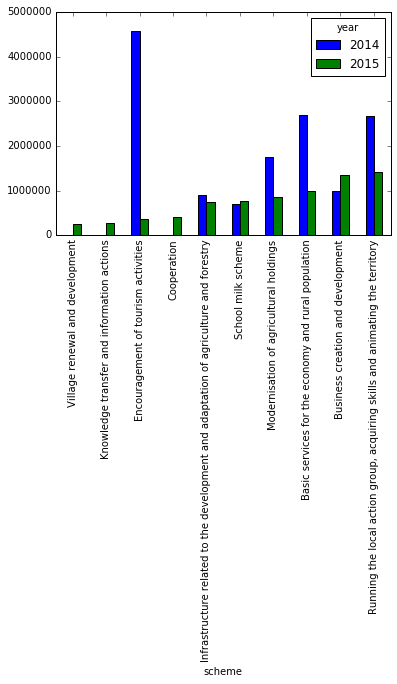

In [122]:
schemes.plot(kind="bar")